In [1]:
# Importing required libraries
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Downloading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# **Introducing noise to the images**

As we are going to build an autoencoder for noisy images, below we will add noise by some factor to the images.

In [3]:
# Adding noise to images
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

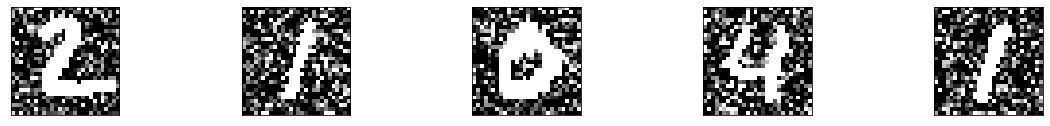

In [4]:
# Plotting some noisy images
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Defining the Autoencoder**

Below first we will build the encoder model, which is two layers of convolution and each convolution layer is followed by the Max Pooling layer. The decoder is the same as the encoder but where layers are managed in the reverse order of that of the encoder and each Convolution layer is followed by the Upsampling layer. 

In [5]:
# Defining autoencoder
model = Sequential()

# Encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

# Decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))

model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

In [6]:
# Compile the Autoencoder 
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [7]:
# Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 35)        350       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 35)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 25)        7900      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 25)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 25)          5650      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 25)       0

# **Training the Autoencoder**

We are now all set to train the model, in the fit method we will supply noisy images with targeted clear images. The autoencoder will train for 15 epochs with a batch size of 128.  

In [8]:
# Training the autoencoder
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 173s 367ms/step - loss: -487.2257 - val_loss: -509.8483
Epoch 2/15
469/469 [==============================] - 165s 352ms/step - loss: -502.9352 - val_loss: -510.4340
Epoch 3/15
469/469 [==============================] - 170s 362ms/step - loss: -503.3436 - val_loss: -510.7155
Epoch 4/15
469/469 [==============================] - 165s 351ms/step - loss: -503.5406 - val_loss: -510.8614
Epoch 5/15
469/469 [==============================] - 165s 353ms/step - loss: -503.6765 - val_loss: -510.9665
Epoch 6/15
469/469 [==============================] - 166s 354ms/step - loss: -503.7905 - val_loss: -511.0740
Epoch 7/15
469/469 [==============================] - 170s 362ms/step - loss: -503.8728 - val_loss: -511.1263
Epoch 8/15
469/469 [==============================] - 169s 359ms/step - loss: -503.9432 - val_loss: -511.1668
Epoch 9/15
469/469 [==============================] - 169s 360ms/step - loss: -503.9968 - val_loss: -511.2356
Epoch 10/1

# **Generating denoised images**

So now let’s construct the digit. Below we will obtain the prediction for all noisy batches of images then we will compare the noisy images with the representation given by the autoencoders.

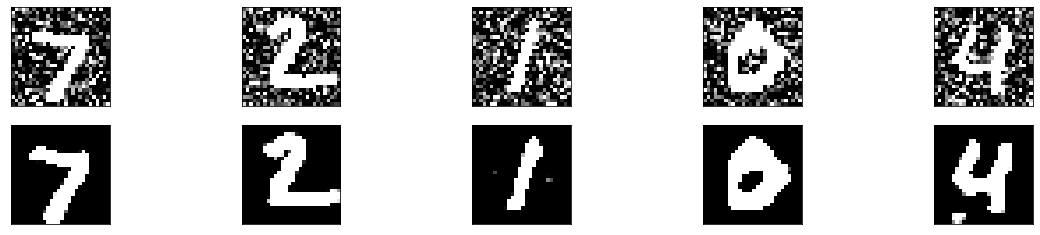

In [9]:
# Making predictions with a trained autoencoder to generate the denoised image
pred = model.predict(x_test_noisy)
# Checking results
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
